<a href="https://colab.research.google.com/github/lisasdi/CodePfe/blob/main/Traitementmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# algo djikstra

In [235]:
def dijkstra(G, source='0'):
    assert all(G[u][v] >= 0 for u in G.keys() for v in G[u].keys())
    precedent = {x:None for x in G.keys()}
    dejaTraite = {x:False for x in G.keys()}
    distance =  {x:float('inf') for x in G.keys()}
    distance[source] = 0
    a_traiter = [(0, source)]
    while a_traiter:
        dist_noeud, noeud = a_traiter.pop()
        if not dejaTraite[noeud]:
            dejaTraite[noeud] = True
            for voisin in G[noeud].keys():
                dist_voisin = dist_noeud + G[noeud][voisin]
                if dist_voisin < distance[voisin]:
                    distance[voisin] = dist_voisin
                    precedent[voisin] = noeud
                    a_traiter.append((dist_voisin, voisin))
        a_traiter.sort(reverse=True)
    return distance, precedent


G1={}
G1['0']={'1':88}
G1['1']={'7':34,'2':50}
G1['2']={'16':11,'3':7,'1':50}
G1['3']={'2':6,'17':5,'4':8}
G1['4']={'3':8,'5':8}
G1['5']={'4':8,'6':8,'9':11}
G1['6']={'5':8,'7':27}
G1['7']={'1':34,'8':39}
G1['8']={'7':39,'9':36}
G1['9']={'10':57,'8':36,'5':11}
G1['10']={'9':57,'14':21,'11':63}
G1['11']={'12':20,'10':63}
G1['12']={'11':20,'13':45,'14':66}
G1['13']={'12':45}
G1['14']={'15':16,'10':21,'12':66,'16':39}
G1['15']={'14':16}
G1['16']={'2':11,'14':39}
G1['17']={'3':5}
print("'noeud:{sommetvoisin :distance}'")
print("---->")
print(G1)
print("---->")
distance, precedent = dijkstra(G1)
print('Distances minimum :',distance)
print("---->")
print('Liste des précédents :', precedent)



'noeud:{sommetvoisin :distance}'
---->
{'0': {'1': 88}, '1': {'7': 34, '2': 50}, '2': {'16': 11, '3': 7, '1': 50}, '3': {'2': 6, '17': 5, '4': 8}, '4': {'3': 8, '5': 8}, '5': {'4': 8, '6': 8, '9': 11}, '6': {'5': 8, '7': 27}, '7': {'1': 34, '8': 39}, '8': {'7': 39, '9': 36}, '9': {'10': 57, '8': 36, '5': 11}, '10': {'9': 57, '14': 21, '11': 63}, '11': {'12': 20, '10': 63}, '12': {'11': 20, '13': 45, '14': 66}, '13': {'12': 45}, '14': {'15': 16, '10': 21, '12': 66, '16': 39}, '15': {'14': 16}, '16': {'2': 11, '14': 39}, '17': {'3': 5}}
---->
Distances minimum : {'0': 0, '1': 88, '2': 138, '3': 145, '4': 153, '5': 161, '6': 169, '7': 122, '8': 161, '9': 172, '10': 209, '11': 272, '12': 254, '13': 299, '14': 188, '15': 204, '16': 149, '17': 150}
---->
Liste des précédents : {'0': None, '1': '0', '2': '1', '3': '2', '4': '3', '5': '4', '6': '5', '7': '1', '8': '7', '9': '5', '10': '14', '11': '10', '12': '14', '13': '12', '14': '16', '15': '14', '16': '2', '17': '3'}


#Les import 

In [205]:
from graphviz import Digraph
from google.colab import files 
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import cv2
from IPython.display import Audio
import copy

#Fonctions

## Fonction qui retourne le type

In [206]:
class InfosType:
  def __init__(self,tab):
    self.tableau=tab
    self.Suiv=None

enteteY = InfosType(None)
enteteT = InfosType(None)
enteteV = InfosType(None)
enteteX = InfosType(None)
enteteDr = InfosType(None)
#fct ajouter 
def ajouterListetype (p,entete):
    suiv = entete.Suiv
    entete.Suiv = p
    entete.Suiv.Suiv = suiv
#fct afficher 
def afficherListetype(entete):
   courant = entete.Suiv
   while (courant != None):
     print(courant.tableau)
     print ('->')
     courant = courant.Suiv



In [207]:
# retourner le type d'une jonction
def Ensembleappart(tab,enteteDr,enteteT,enteteV,enteteX,enteteY):
  x2=tab
  x2.sort()
  #type x
  courant = enteteX.Suiv

  while (courant != None):
    x1=courant.tableau
    x1.sort()
    if(x1==x2):
        return 'X'
    courant = courant.Suiv
  #type y

  courant = enteteY.Suiv

  while (courant != None): 
     x1=courant.tableau
     x1.sort()
     if(x1==x2):
        return 'Y'
     courant = courant.Suiv
  #type T
  courant = enteteT.Suiv
  while (courant != None):
     x1=courant.tableau
     x1.sort()  
     if(x1==x2):
        return 'T'
     courant = courant.Suiv
  #type droite 
  courant = enteteDr.Suiv
  while (courant != None):
     x1=courant.tableau
     x1.sort()
     if(x1==x2):
        return 'Dr'
     courant = courant.Suiv
  #type V
  courant = enteteV.Suiv
  while (courant != None):
     x1=courant.tableau
     x1.sort()  
     if(x1==x2):
        return 'V'
     courant = courant.Suiv
  


##fonction qui concerne la definition de l'emplacement 

In [208]:
#chercher son emplacement

def recherche_emplacement(liste,typen,nbregions,noeud_preced):
   p = liste.Suiv
   listevoisins=[]
   #tant que la liste est non vide trouver la liste des voisins du noeud
   while p != None:
          if (p.id==noeud_preced):
                listevoisins=(p.tableau).copy()
          p = p.Suiv
   
   #Trouver les noeuds dans listevoisins qui correspondent à type et nbregions
   listenoeuds_correspd=[]
   for i in range(0,len(listevoisins)):
     idnoeud=listevoisins[i]
     p = liste.Suiv
   #tant que la liste est non vide trouver la liste des noeuds correspd
     while p != None:
            if (p.id==idnoeud and p.Type==typen and p.nb_voisins==nbregions):
                  listenoeuds_correspd.append(p.id)
            p = p.Suiv
   #returner listenoeuds
   return listenoeuds_correspd
  

In [209]:
#s'il y a plus d'un noeud au résultat
def sauvegardernoeud_endouble(listeattente,listen):
      if(len(listen)>1):
         liste=listen.copy()
         #une liste de liste
         listeattente.append(liste)
      return listeattente

In [210]:
#afficher le résultat et sauvegarder son déplacement 
def sauvegarder_afficher_deplacement(listedeplacement,listen,listeattente,gr1):
  prochain=[]
  if  len(listeattente)!=0:
    #il faut traiter les anciens noeuds ici!
    voisins=gr1.voisins(str(listen[-1])).copy()
    print(voisins)
    liste=listeattente[-1].copy()
    for i in range(0,len(liste)):
      if (liste[i] in voisins):
        prochain.append(liste[i])
        print("Vous etiez au point ",liste[i])
    # à vérifier 
    #listeattente[:]=[]
    listeattente.remove(liste)
    while  len(listeattente)!=0:
       #il faut traiter les anciens noeuds ici!
       voisins=gr1.voisins(str(prochain[-1])).copy()
       print(voisins)
       liste=listeattente[-1].copy()
       for i in range(0,len(liste)):
           if (liste[i] in voisins):
              prochain.append(liste[i])

              print("Vous etiez au point ",liste[i])
              listeattente.remove(liste)
       
  newList = [num for num in reversed(prochain)]
  for i in range(0,len(newList)):
    listedeplacement.append(newList[i])

  #sauvegarder
  listedeplacement.append(listen[0])
  print("Vous etes au point ",listen[0])
    

##fonction qui concerne le dessin sur la Map

In [211]:
#pour emplacement
def completer_listedep(entete,typee,nb,listedeplacement,listeattente,gr1):
  a=None
  if len(listeattente)==0:
   #lire le dernier noeud dans listedeplacement avec [-1]
    listen=recherche_emplacement(entete,typee,nb,str(listedeplacement[-1])).copy()
  else:
    listeattentecopy=listeattente.copy()
    listen=[]
    for i in range(0,(len(listeattente))):
      liste=listeattentecopy[i].copy()
      for j in range(0,(len(liste))):
        listen.extend(recherche_emplacement(entete,typee,nb,str(liste[j])))

  listeattente=sauvegardernoeud_endouble(listeattente,listen).copy()

  if len(listen)!=1:
   a=Audio("/content/drive/MyDrive/Pfe/wav/Avancer.wav")

   print('avancer')
  else:
     sauvegarder_afficher_deplacement(listedeplacement,listen,listeattente,gr1)
  return listedeplacement,listeattente,a


In [212]:
#fonction pour recuperer x et y de deplacement 
def recuperer_xy(liste,listeg):
  listex=[]
  listey=[]
  deb=[]
  fin=[]
  for i in range(0,len(liste)):
     p = listeg.Suiv
    #tant que la liste est non vide trouver la liste des voisins du noeud
     while p != None:
          if (p.id==liste[i]):
                listex.append(p.x)
                listey.append(p.y)
                if(i==0):
                  deb.append(p.x)
                  deb.append(p.y)
                  deb.append(p.nom)
                  deb.append(p.id)
                if(i==len(liste)-1):
                  fin.append(p.x)
                  fin.append(p.y)
                  fin.append(p.nom)
                  fin.append(p.id)


          p = p.Suiv
  return listex,listey,deb,fin

#pour afficher le résultat
def resultat_chemin(data,axeX,axeY,deb,fin):

 f = plt.figure()


 fig, ax = plt.subplots()
 fig.figimage(logo, 0, 20,alpha=.5 ,zorder=8)
 fig.set_figwidth(20)
 fig.set_figheight(15)
 fig.patch.set_facecolor( 'black')
 fig.patch.set_alpha( 0.4)

 plt.plot(axeX,axeY,linestyle = 'none', marker = '+', c = 'r',
 markersize = 3.5) 
 plt.plot(deb[0],deb[1],linestyle = 'none', marker = 'o', c = 'w',
 markersize = 6) 
 plt.plot(fin[0],fin[1],linestyle = 'none', marker = 'o', c = 'w',
 markersize = 6)


 #add image
 imagebox = OffsetImage(logo, zoom=1)
 imageboxdeb = OffsetImage(logodeb, zoom=1)
 ab = AnnotationBbox(imagebox, (fin[0], fin[1]-10),frameon=False)
 ab1=  AnnotationBbox(imageboxdeb, (deb[0], deb[1]-7),frameon=False)
 ax.add_artist(ab)
 ax.add_artist(ab1)

 plt.plot(axeX, axeY, color="green", linewidth=4)
 plt.title('Géolocalisation de notre individu', fontsize = 25, x = 0.5, y = 1.05,fontweight = 'bold',family = 'sans-serif')
 plt.text(20, 40, ' Votre position de départ : ' +deb[2],
            fontsize = 15, color = 'black',fontweight = 'bold',family = 'sans-serif', bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 20,'edgecolor': 'white'})
 plt.text(20, 80, ' Votre position actuelle : ' +fin[2],
            fontsize = 15, color = 'black',fontweight = 'bold',family = 'sans-serif',bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 20,'edgecolor': 'white'})
 plt.xticks([])
 plt.yticks([])
 ax = plt.gca()
 for spine in ax.spines:
    ax.spines[spine].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
#plt.savefig('11spines_thumb.png', dpi=200, bbox_inches='tight'); 
 plt.imshow(data)

 plt.show()

## Fonctions de la liste des données

In [213]:
from numpy import zeros,array

#declaration d'un enregistrement pour les infos de chaque sommet 
class InfosSommet:
  # Une méthode utilisée pour créer l'objet (Contructor).
  def __init__(self, id):
    self.id=id
    self.nb_voisins=None
    self.tableau=None
    self.nom=None
    self.Type =None
    self.x =None
    self.y=None
    self.Suiv=None
#une cellule à null
entete = InfosSommet (-1)
#fonction pour l'ajout dans la liste 
def ajouter (p):
    suiv = entete.Suiv
    entete.Suiv = p
    entete.Suiv.Suiv = suiv
#afficher les elements de la liste
def afficher(entete):
 courant = entete.Suiv
 while (courant != None):
  
  print (courant.id)
  print (courant.nb_voisins)
  print (courant.tableau)
  print (courant.nom)
  print (courant.Type)
  print (courant.x)
  print (courant.y)
  print ('->')
  courant = courant.Suiv

# on va utiliser str(i) pour convertir le type int en string pour suivre la structure de notre graphe
def creationListeGraphe(gr,entete,enteteDr,enteteT,enteteV,enteteX,enteteY):
  for i in range(0,19):
    info=InfosSommet(str(i))
    info.nb_voisins=(len(gr.voisins(str(i))))
    info.tableau=gr.voisins(str(i))
    # pour recuperer les types 
    tabb=[str(i)]
    for element in gr.voisins(str(i)):
        tabb.append(element)
    info.Type=Ensembleappart(tabb,enteteDr,enteteT,enteteV,enteteX,enteteY)
    info.x=listeX[i]
    info.y=listeY[i]
    info.nom=noms[i]
    ajouter(info)


#Données en entrée pour la listeGraphe

In [214]:
#Les coordonnées de x et y sur l'image map
listeX=[566, 434, 336, 329, 320, 323, 336, 393, 341, 300, 237, 165, 201, 274, 277, 309.2, 313, 340, 342]
listeY=[159, 316, 331, 340, 349, 362, 374, 365, 430, 373, 278, 168, 143, 87, 258, 248.2, 328, 346, 473]
#Les noms de chaque noeud
noms=['Portail','Espace internet','Entre la salle de conférences et departement informatique','Devant la Salle de conférences','Sortie de la salle de conférences','Salle de conférences','Derrière le kiosque',
      ' Derrière la salle de conférences','Kiosque','Entre le kiosque et faculté GC','Devant la faculté GC','Kiosque','Chemin vers le parking',
      'Chemin vers parking','Devant la faculté informatique','faculté informatique','chemin vers la faculté informatique','Entrée vers la salle de conférences',
      'Buvette']

In [215]:
#Les types des jonctions 
#type T
t1=["12","11","13","14"]
t2=["10","9","11","14"]
t3=["9","8","10","5"]
t4=["3","4","2","17"]
#
Liste=[t1,t2,t3,t4]
for i in range(0,len(Liste)):
  var=Liste[i]
  cel=InfosType(var)
  ajouterListetype(cel,enteteT)


In [216]:
#Type V
v2=["6","5","7"]
v3=["4","3","5"]
v4=["16","14","2"]
v5=["11","12","10"]
#
Liste=[v2,v3,v4,v5]
for i in range(0,len(Liste)):
  var=Liste[i]
  cel=InfosType(var)
  ajouterListetype(cel,enteteV)

In [217]:
#Type X
x1=["14","12","16","10","15"]
Liste=[x1]
for i in range(0,len(Liste)):
  var=Liste[i]
  cel=InfosType(var)
  ajouterListetype(cel,enteteX)


In [218]:
#Type Droite
d1=["1","0"]
d2=["13","12"]
d3=["15","14"]
d4= ["17","3"]
d5= ["18","8"]
#
Liste=[d1,d2,d3,d4,d5]
#
for i in range(0,len(Liste)):
  var=Liste[i]
  cel=InfosType(var)
  ajouterListetype(cel,enteteDr)


In [219]:
y1=["2", "7", "1", "0"]
y2=["6","8","7","1"]
y3=["4","6","5","9"]
y4=["16","3","2","1"]
y5=v1=["9","7","8","18"]
#
Liste=[y1,y2,y3,y4,y5]
#
for i in range(0,len(Liste)):
  var=Liste[i]
  cel=InfosType(var)
  ajouterListetype(cel,enteteY)

In [220]:
# liste qui contient id sommet nb_voisins
def chercherID_nbVoisins(liste,nb):
   list=[]
   p = liste.Suiv
   #tant que la liste est non vide
   while p != None:
        if p.nb_voisins == nb:
          #si nb voisin est le mm ,on ajoute l'id dans une liste 
            list.append(p.id)
            p = p.Suiv
        else :
          p = p.Suiv
   return list


In [221]:
#2eme listes,qui contient id sommet nb_voisins kifkif + voisin de sommet init 
def chercherID_SommetVoisins(liste,id):
  list=[]
  #stocker les voisins dans une liste
  voisin=gr1.voisins(id)
  #parcourir cette liste
  for i in range(0,len(gr1.voisins(id))):
    #verifier si id_sommet_nb_voisins existe dans cette liste
    if voisin[i] in liste:
      #si oui , on le stocke dans une autre liste 
      list.append(voisin[i])

  
  
  return list

# Graphe ponderer

In [222]:
# ls créent des descriptions de graphes dans le langage DOT pour les graphes non orientés et orientés respectivement.

class Graphe():
    def __init__(self, noeuds = None):#initialement pas de noeud
        if noeuds is None:
            self.__noeuds = dict() #creer un graphe vide avec dict qui contient deux truc une cle representant la valeur du noeud et liste d'aretes (clé, poids), __noeuds est un dictionnaire
        else:
            self.__noeuds = noeuds #ajout d'un noeud au graphe
    
    def importe_matrice(self, matrice, noms):
        """Importe une matrice d'adjacence"""
        longueur = len(matrice) #longeur de la matrice adjancente
        for i in range(longueur):
            self.__noeuds[noms[i]] = [] # nom de chaque composante de la matrice 
            for j in range(longueur):
                if matrice[i][j] != 0:
                    self.__noeuds[noms[i]].append((noms[j], matrice[i][j]))
    
    def ajouter_noeud(self, nd):
        """Ajoute un nouveau noeud au graphe"""
        if not nd in self.__noeuds: # si le noeud n'ai pas dans le dictionnaire du graphe
            self.__noeuds[nd] = []# ajout
    
    def ajouter_arete(self, nd1, nd2, poids=1):#le poid initialement est a 1 , pour chaque noued au quelle en associe pas un poid il est =1 par defaut
        # On s'assure que les arètes existent
        self.ajouter_noeud(nd1) #ajout noeud1
        self.ajouter_noeud(nd2)#ajout noeud2
        # On crée la connexion nd1 -> nd2
        self.__noeuds[nd1].append((nd2, poids)) #relier nd1 et nd2 avec leur oid associer
         #connexion nd2 vers nd1
        self.__noeuds[nd2].append((nd1, poids))#relier nd2 et nd1 avec leurs poid associer
    
    def liste_noeuds(self):
        """Renvoie la liste des noeuds"""
        nds = list(self.__noeuds.keys()) #mettre dans une liste tout les valeurs noeuds
        nds.sort()#trier
        return nds#retourner la liste des noeuds trier
    
    def voisins(self, nd):
        """Renvoie la liste des noeuds voisins de nd"""
        if nd in self.liste_noeuds(): # si le noued appartient au graphe
            return [a[0] for a in self.__noeuds[nd]] # a appartient au graphe , a[0] represente son voisin
        else:
            return [] #si le noeud appartient pas au graphe alors pas de voisins
    
    def arete(self,nd1, nd2):
       
        if nd2 not in self.voisins(nd1):
            return 0 # si y a pas d'aretes entres deux noeud on renvoie 0
        for a in self.__noeuds[nd1]:
            if a[0] == nd2:# si y a relation entre les deux noeuds
                return a[1]# Renvoie le poids de l'arete nd1->nd2 
        
    
    def show(self):
        """Représentation graphique avec graphviz"""
        dot = Digraph(comment="Graphe", format='png') #Représentation graphique avec graphviz avec le nom graphe format png
        for nd in self.liste_noeuds():#si le noeud appartient au graphe
            dot.node(nd,nd)# representer le noeuds
            for a in self.__noeuds[nd]:
                # Teste si l'arête est orientée
                if self.arete(a[0], nd) == self.arete(nd, a[0]) :
                    # dessin d'une arête non orientée
                    if a[0]< nd:
                        # On ne dessine qu'une seule arête sur les 2
                        if a[1] != 1:
                            dot.edge(nd, a[0],label=str(a[1]), dir="none")
                        else:
                            dot.edge(nd, a[0], dir="none")#representer l'aretes entre nd1 et son voir a[0]
                else:
                    # dessin d'une arête orientée
                    if a[1] != 1:
                        dot.edge(nd, a[0],label=str(a[1])) #representer l'arete entre nd1 et son voisins
                    else:
                        dot.edge(nd, a[0])

        return dot

    def parcours_profondeur(self, depart):
        """Parcourt l'arbre en profondeur"""
        def dfs(nd):
            # YOUR CODE HERE
            raise NotImplementedError()
        deja_vu = []  # noeuds déjà visités
        dfs(depart)
        return deja_vu


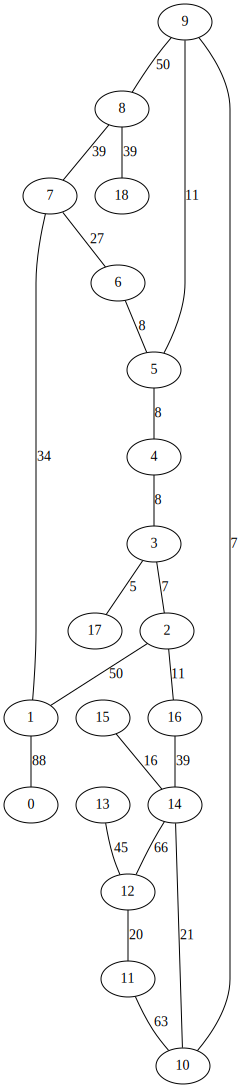

In [223]:
gr1=Graphe()
gr1.ajouter_arete("0", "1",88)
gr1.ajouter_arete("1", "2",50)
gr1.ajouter_arete("2", "3",7)
gr1.ajouter_arete("1", "7",34)
gr1.ajouter_arete("2", "16",11)
gr1.ajouter_arete("7", "8",39)
gr1.ajouter_arete("7", "6",27)
gr1.ajouter_arete("3", "17",5)
gr1.ajouter_arete("3", "4",8)
gr1.ajouter_arete("4", "5",8)
gr1.ajouter_arete("5", "6",8)
gr1.ajouter_arete("5", "9",11)
gr1.ajouter_arete("8", "9",50)
gr1.ajouter_arete("9", "10",7)
gr1.ajouter_arete("10", "14",21) 
gr1.ajouter_arete("10", "11",63)
gr1.ajouter_arete("11", "12",20)
gr1.ajouter_arete("12", "13",45)
gr1.ajouter_arete("12", "14",66)
gr1.ajouter_arete("14", "15",16)
gr1.ajouter_arete("14", "16",39)
gr1.ajouter_arete("8", "18",39)
gr1.show()

#main

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
#importer file
uploaded=files.upload()

In [227]:
#creer la liste Graphe
creationListeGraphe(gr1,entete,enteteDr,enteteT,enteteV,enteteX,enteteY)

In [228]:
#initialiser la liste de deplacement avec la premiere position de l'individu
listedeplacement=[]
listedeplacement.append('1')
#initialiser la liste d'attente à zero
listeattente=[]
#lire les images en sorties 
logo = plt.imread('./icon2.png')
logodeb=plt.imread('./deb.png')
logodeb= cv2.resize(logodeb, (30, 30), interpolation= cv2.INTER_AREA)
data = image.imread('map.png') 


In [229]:
listedeplacement,listeattente,a=completer_listedep(entete,'Y',3,listedeplacement,listeattente,gr1)
a

avancer


In [230]:
listedeplacement,listeattente,a=completer_listedep(entete,'V',2,listedeplacement,listeattente,gr1)
a

avancer


<Figure size 432x288 with 0 Axes>

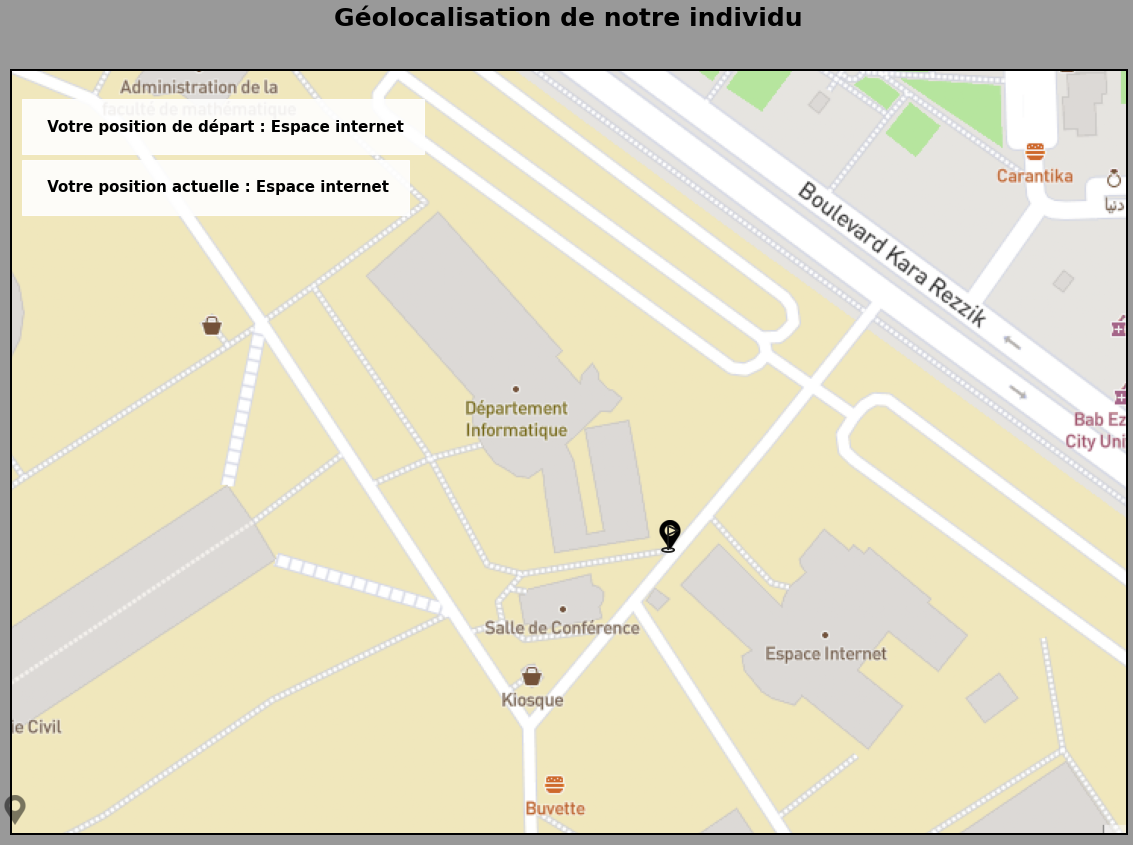

In [231]:
axeX,axeY,deb,fin=recuperer_xy(listedeplacement,entete)
resultat_chemin(data,axeX,axeY,deb,fin)
b=Audio("/content/drive/MyDrive/Pfe/wav/"+fin[3]+".wav")
b

In [232]:
listedeplacement,listeattente,a=completer_listedep(entete,'X',4,listedeplacement,listeattente,gr1)
a

['10', '12', '15', '16']
Vous etiez au point  16
['2', '14']
Vous etiez au point  2
Vous etes au point  14


<Figure size 432x288 with 0 Axes>

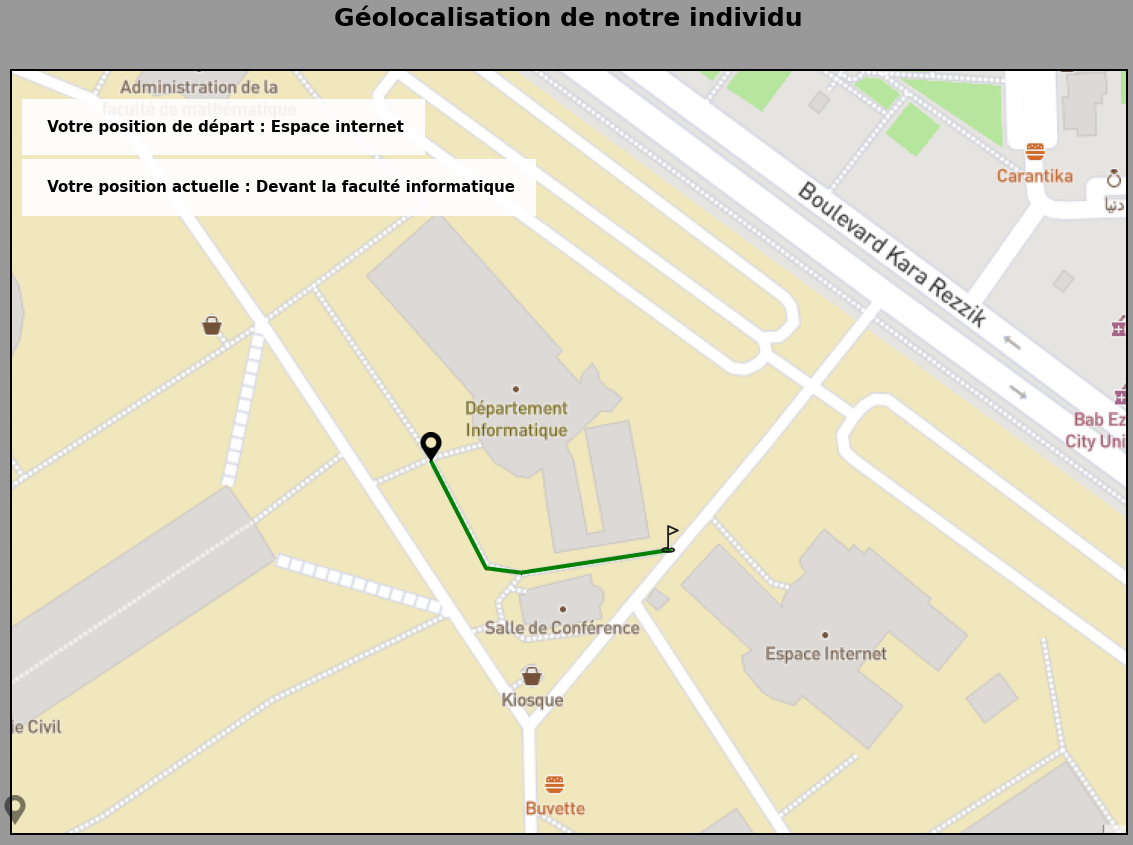

In [233]:

axeX,axeY,deb,fin=recuperer_xy(listedeplacement,entete)


resultat_chemin(data,axeX,axeY,deb,fin)
b=Audio("/content/drive/MyDrive/Pfe/wav/"+fin[3]+".wav")
b